# HomeWork - 3




# Option 2 Data wrangling/visualization/analysis

# Team Member : Sugandha Rastogi, Sukanya Tabhane

Note: We are using BeautifulSoup to web sracpe two web data ,States Population and Race table from worldpopulationreview.com. We are getting two HTML table. First we are using web scrape to get the data and  create the dataframe for each. Then merging both data frames into a pandas DataFrame for further analysis.

In [117]:
import requests
import pandas as pd
import bs4
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [2]:
from bokeh.io import output_notebook

In [3]:
%matplotlib inline

In [4]:
#dataset 1
url_usstates = 'https://worldpopulationreview.com/states'
text_usstates = requests.get(url_usstates).text

In [5]:
soup_popbystate = bs4.BeautifulSoup(text_usstates)

In [6]:
stats_table = soup_popbystate.table

In [7]:
stats_table_rows = stats_table.find_all('tr')

In [8]:
header_row = stats_table_rows[0]

In [9]:
ths = header_row.find_all('th')
header = [th.text.strip() for th in ths]
print(header)
print(len(header))

['Rank', 'State', '2021 Population', 'Growth 2021', '2018 Population', '2010 Census', 'Growth Since 2010', '% of US', 'Density (mi²)']
9


In [10]:
stats_data_rows = []
for tr in stats_table_rows:
    tds = tr.find_all('td')
    row = [td.text for td in tds]
    if row:
        stats_data_rows.append(row)


popbystate_df = pd.DataFrame(stats_data_rows, columns = header)
popbystate_df.head()

,Rank,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth Since 2010,% of US,Density (mi²)
0,1,California,"39,613,493",0.38%,"39,461,588","37,319,502",6.15%,11.84%,254
1,2,Texas,"29,730,311",3.85%,"28,628,666","25,241,971",17.78%,8.89%,114
2,3,Florida,"21,944,577",3.30%,"21,244,317","18,845,537",16.44%,6.56%,409
3,4,New York,"19,299,981",-1.18%,"19,530,351","19,399,878",-0.51%,5.77%,410
4,5,Pennsylvania,"12,804,123",0.03%,"12,800,922","12,711,160",0.73%,3.83%,286


In [11]:
popbystate_df.dtypes

Rank                 object
State                object
2021 Population      object
Growth 2021          object
2018 Population      object
2010 Census          object
Growth Since 2010    object
% of US              object
Density (mi²)        object
dtype: object

All the columns of our dataframe are of string type. We need to convert all the columns to int or float except the State column for correct analysis.

In [12]:
##converting data types of variables
popbystate_df["Rank"] = popbystate_df["Rank"].astype("int")
popbystate_df["2021 Population"] = popbystate_df["2021 Population"].str.replace(',','').astype("int")
popbystate_df["2018 Population"] = popbystate_df["2018 Population"].str.replace(',','').astype("int")
popbystate_df["2010 Census"] = popbystate_df["2010 Census"].str.replace(',','').astype("int")
popbystate_df["Density (mi²)"] = popbystate_df["Density (mi²)"].str.replace(',','').astype("int")
popbystate_df["Growth Since 2010"]=popbystate_df["Growth Since 2010"].str.replace(r'%','').astype("float")
popbystate_df["% of US"]=popbystate_df["% of US"].str.replace(r'%','').astype("float")
popbystate_df["Growth 2021"]=popbystate_df["Growth 2021"].str.replace(r'%','').astype("float")

In [13]:
popbystate_df.dtypes

Rank                   int32
State                 object
2021 Population        int32
Growth 2021          float64
2018 Population        int32
2010 Census            int32
Growth Since 2010    float64
% of US              float64
Density (mi²)          int32
dtype: object

In [14]:
popbystate_df.sort_values(by = ['% of US'])

,Rank,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth Since 2010,% of US,Density (mi²)
51,52,Wyoming,581075,0.60,577601,564487,2.94,0.17,6
50,51,Vermont,623251,-0.18,624358,625879,-0.42,0.19,68
49,50,District of Columbia,714153,1.80,701547,605226,18.00,0.21,11707
48,49,Alaska,724357,-1.47,735139,713910,1.46,0.22,1
47,48,North Dakota,770026,1.58,758080,674715,14.13,0.23,11
46,47,South Dakota,896581,2.04,878698,816166,9.85,0.27,12
45,46,Delaware,990334,2.57,965479,899593,10.09,0.30,508
44,45,Rhode Island,1061509,0.30,1058287,1053959,0.72,0.32,1027
43,44,Montana,1085004,2.29,1060665,990697,9.52,0.32,7
42,43,Maine,1354522,1.15,1339057,1327629,2.03,0.40,44


Summary: By this table we can see each state population contribution to US population in ascending order

In [124]:
##dataset 2 : state population by race
url_popbyrace = 'https://worldpopulationreview.com/states/states-by-race'
text_popbyrace = requests.get(url_popbyrace).text

In [125]:
soup_popbyrace = bs4.BeautifulSoup(text_popbyrace)

In [126]:
stats_table = soup_popbyrace.table

In [127]:
stats_table_rows = stats_table.find_all('tr')

In [128]:
header_row = stats_table_rows[0]

In [129]:
ths = header_row.find_all('th')
header = [th.text.strip() for th in ths]
print(header)
print(len(header))

['State', 'White', 'Black', 'Indian', 'Asian', 'Hawaiian', 'Other']
7


In [130]:
stats_data_rows = []
for tr in stats_table_rows:
    tds = tr.find_all('td')
    row = [td.text for td in tds]
    if row:
        stats_data_rows.append(row)


popbyrace_df = pd.DataFrame(stats_data_rows, columns = header)
popbyrace_df.head()

,State,White,Black,Indian,Asian,Hawaiian,Other
0,Alabama,68.09%,26.64%,0.52%,1.36%,0.05%,3.34%
1,Alaska,64.58%,3.28%,14.89%,6.23%,1.25%,9.76%
2,Arizona,77.22%,4.50%,4.50%,3.31%,0.21%,10.26%
3,Arkansas,76.72%,15.32%,0.68%,1.52%,0.29%,5.47%
4,California,59.70%,5.79%,0.77%,14.49%,0.40%,18.85%


In [131]:
#checking data type
popbyrace_df.dtypes

State       object
White       object
Black       object
Indian      object
Asian       object
Hawaiian    object
Other       object
dtype: object

In [132]:
#convert data types for variables
popbyrace_df["White"]=popbyrace_df["White"].str.replace(r'%','').astype("float")
popbyrace_df["Black"]=popbyrace_df["Black"].str.replace(r'%','').astype("float")
popbyrace_df["Indian"]=popbyrace_df["Indian"].str.replace(r'%','').astype("float")
popbyrace_df["Asian"]=popbyrace_df["Asian"].str.replace(r'%','').astype("float")
popbyrace_df["Hawaiian"]=popbyrace_df["Hawaiian"].str.replace(r'%','').astype("float")
popbyrace_df["Other"]=popbyrace_df["Other"].str.replace(r'%','').astype("float")

In [30]:
#check data type again 
popbyrace_df.dtypes

State        object
White       float64
Black       float64
Indian      float64
Asian       float64
Hawaiian    float64
Other       float64
dtype: object

In [31]:
display(popbyrace_df)

,State,White,Black,Indian,Asian,Hawaiian,Other
0,Alabama,68.09,26.64,0.52,1.36,0.05,3.34
1,Alaska,64.58,3.28,14.89,6.23,1.25,9.76
2,Arizona,77.22,4.50,4.50,3.31,0.21,10.26
3,Arkansas,76.72,15.32,0.68,1.52,0.29,5.47
4,California,59.70,5.79,0.77,14.49,0.40,18.85
5,Colorado,84.00,4.16,0.98,3.18,0.15,7.53
6,Connecticut,75.92,10.72,0.28,4.51,0.03,8.54
7,Delaware,68.76,22.18,0.39,3.87,0.06,4.75
8,District of Columbia,41.27,46.31,0.30,3.98,0.05,8.08
9,Florida,75.12,16.07,0.28,2.73,0.06,5.73


In [37]:
## merge dataset 1 and dataset 2 and creating new data frame 
df = pd.merge(popbystate_df,popbyrace_df, on= 'State')


In [38]:
# population in order
display(df)

,Rank,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth Since 2010,% of US,Density (mi²),Code,White,Black,Indian,Asian,Hawaiian,Other
0,1,California,39613493,0.38,39461588,37319502,6.15,11.84,254,CA,59.70,5.79,0.77,14.49,0.40,18.85
1,2,Texas,29730311,3.85,28628666,25241971,17.78,8.89,114,TX,73.97,12.13,0.50,4.80,0.09,8.51
2,3,Florida,21944577,3.30,21244317,18845537,16.44,6.56,409,FL,75.12,16.07,0.28,2.73,0.06,5.73
3,4,New York,19299981,-1.18,19530351,19399878,-0.51,5.77,410,NY,63.66,15.66,0.41,8.42,0.05,11.81
4,5,Pennsylvania,12804123,0.03,12800922,12711160,0.73,3.83,286,PA,80.53,11.18,0.19,3.41,0.03,4.65
5,6,Illinois,12569321,-1.21,12723071,12840503,-2.11,3.76,226,IL,71.53,14.20,0.26,5.47,0.04,8.50
6,7,Ohio,11714618,0.33,11676341,11539336,1.52,3.50,287,OH,81.30,12.41,0.20,2.22,0.03,3.85
7,8,Georgia,10830007,3.03,10511131,9711881,11.51,3.24,188,GA,58.62,31.61,0.36,3.98,0.06,5.36
8,9,North Carolina,10701022,3.08,10381615,9574323,11.77,3.20,220,NC,68.68,21.44,1.21,2.85,0.07,5.75
9,10,Michigan,9992427,0.08,9984072,9877510,1.16,2.99,177,MI,78.41,13.79,0.54,3.13,0.03,4.10


In [133]:
# creating  report for merged data frame
us_stats_report = sv.analyze(df)

In [40]:
# display the report
us_stats_report.show_html("sweetviz_report.html")

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [135]:
df.drop(['Rank'], axis =1)

,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth_cat2021,Growth Since 2010,% of US,Density (mi²),Code,White,Black,Indian,Asian,Hawaiian,Other,Growth_2018,Compare
0,California,39613493,0.38,39461588,37319502,low,6.15,11.84,254,CA,59.70,5.79,0.77,14.49,0.40,18.85,0.057399,2010
1,Texas,29730311,3.85,28628666,25241971,average,17.78,8.89,114,TX,73.97,12.13,0.50,4.80,0.09,8.51,0.134169,2010
2,Florida,21944577,3.30,21244317,18845537,average,16.44,6.56,409,FL,75.12,16.07,0.28,2.73,0.06,5.73,0.127286,2010
3,New York,19299981,-1.18,19530351,19399878,very low,-0.51,5.77,410,NY,63.66,15.66,0.41,8.42,0.05,11.81,0.006725,2010
4,Pennsylvania,12804123,0.03,12800922,12711160,low,0.73,3.83,286,PA,80.53,11.18,0.19,3.41,0.03,4.65,0.007062,2010
5,Illinois,12569321,-1.21,12723071,12840503,very low,-2.11,3.76,226,IL,71.53,14.20,0.26,5.47,0.04,8.50,-0.009145,2021
6,Ohio,11714618,0.33,11676341,11539336,low,1.52,3.50,287,OH,81.30,12.41,0.20,2.22,0.03,3.85,0.011873,2010
7,Georgia,10830007,3.03,10511131,9711881,average,11.51,3.24,188,GA,58.62,31.61,0.36,3.98,0.06,5.36,0.082296,2010
8,North Carolina,10701022,3.08,10381615,9574323,average,11.77,3.20,220,NC,68.68,21.44,1.21,2.85,0.07,5.75,0.084318,2010
9,Michigan,9992427,0.08,9984072,9877510,low,1.16,2.99,177,MI,78.41,13.79,0.54,3.13,0.03,4.10,0.010788,2010


In [136]:
## creating new variable to check the growth % from 2010 to 2018
df['Growth_2018']= (df['2018 Population']-df['2010 Census'])/df['2010 Census']
display(df)

,Rank,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth_cat2021,Growth Since 2010,% of US,Density (mi²),Code,White,Black,Indian,Asian,Hawaiian,Other,Growth_2018,Compare
0,1,California,39613493,0.38,39461588,37319502,low,6.15,11.84,254,CA,59.70,5.79,0.77,14.49,0.40,18.85,0.057399,2010
1,2,Texas,29730311,3.85,28628666,25241971,average,17.78,8.89,114,TX,73.97,12.13,0.50,4.80,0.09,8.51,0.134169,2010
2,3,Florida,21944577,3.30,21244317,18845537,average,16.44,6.56,409,FL,75.12,16.07,0.28,2.73,0.06,5.73,0.127286,2010
3,4,New York,19299981,-1.18,19530351,19399878,very low,-0.51,5.77,410,NY,63.66,15.66,0.41,8.42,0.05,11.81,0.006725,2010
4,5,Pennsylvania,12804123,0.03,12800922,12711160,low,0.73,3.83,286,PA,80.53,11.18,0.19,3.41,0.03,4.65,0.007062,2010
5,6,Illinois,12569321,-1.21,12723071,12840503,very low,-2.11,3.76,226,IL,71.53,14.20,0.26,5.47,0.04,8.50,-0.009145,2021
6,7,Ohio,11714618,0.33,11676341,11539336,low,1.52,3.50,287,OH,81.30,12.41,0.20,2.22,0.03,3.85,0.011873,2010
7,8,Georgia,10830007,3.03,10511131,9711881,average,11.51,3.24,188,GA,58.62,31.61,0.36,3.98,0.06,5.36,0.082296,2010
8,9,North Carolina,10701022,3.08,10381615,9574323,average,11.77,3.20,220,NC,68.68,21.44,1.21,2.85,0.07,5.75,0.084318,2010
9,10,Michigan,9992427,0.08,9984072,9877510,low,1.16,2.99,177,MI,78.41,13.79,0.54,3.13,0.03,4.10,0.010788,2010


In [137]:
## categorizing growth in categories very low, low, average, good and high as per bin.
## bins : -2 to 0 is very low, 1 to 2 is low, 3 to 5 is average, 6 to 10 is good, 11 to 15 is high
Category=pd.cut(df['Growth 2021'], bins=[-2,0,2,5,10,15],
                 labels=['very low','low','average', 'good','high'])
df.insert(6,'Growth_cat2021',Category)


ValueError: cannot insert Growth_cat2021, already exists

In [138]:
#df.drop(['Growth_category'], axis =1)

# Visualization

To create a choropleth map using plotly, we need the states code. Creating a dictionary of codes and mapping it with our dataframe.This will serve as the location colum for plotting map.

In [139]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [140]:
popbystate_df['Code'] = popbystate_df['State'].map(code)

In [142]:
fig = px.choropleth(popbystate_df,
                    locations='Code', # DataFrame column with locations
                    color='2021 Population', # DataFrame column with color values
                    color_continuous_scale='blues',
                    hover_name='State',  # DataFrame column hover info
                    locationmode='USA-states',  # Set to plot as US States
                    labels={'2021 Population':'2021 Population'},
                    scope='usa') # Plot only the USA 

# Using add_scattergeo to add text labels to each state 
fig.add_scattergeo(locations=popbystate_df['Code'],
                   locationmode='USA-states',
                   text=popbystate_df['Code'],
                   mode='text'
                  )
fig.update_layout(
    title={'text':'United States Population Distribution',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

Darker areas in the above map indicate highly populated states, while lighter areas indicate less populated states.

This is an interactive map so we can move it, zoom, and get hover annotations based on what we input to the hover_name option.

# IPyWidgets

Using ipy widgets to create Dropdown widget to create a bar graph as the user wants it.

We have put the column names into a list and using this list to populate a Dropdown widget.we have created the widgets - one for the x axis and one for the y axis.

In [143]:
data_cols = df.columns.to_list()
data_cols

['Rank',
 'State',
 '2021 Population',
 'Growth 2021',
 '2018 Population',
 '2010 Census',
 'Growth_cat2021',
 'Growth Since 2010',
 '% of US',
 'Density (mi²)',
 'Code',
 'White',
 'Black',
 'Indian',
 'Asian',
 'Hawaiian',
 'Other',
 'Growth_2018',
 'Compare']

In [144]:
pick_col_x = widgets.Dropdown(
    options=data_cols,
    description='X variable',
)

In [145]:
pick_col_y = widgets.Dropdown(
    options=data_cols,
    description='Y variable',
)

In [146]:
def create_bar(col_1, col_2):
    
    fig = px.bar(df, x=col_1, y=col_2)
    fig.show()

In [147]:
widgets.interact(create_bar, col_1=pick_col_x, col_2=pick_col_y);

interactive(children=(Dropdown(description='X variable', options=('Rank', 'State', '2021 Population', 'Growth …

** Summary : If we choose X Variable Growth 2021 and Y variable State, We can see there are some states like Alaska, vermont, Hawaii, West virginia, Mississipi, Connecticut, Louisiana, New Jersey, illionis and Newyork and negative growth in popultaion. While Idhao, Nevada, Utah, Arizona and texas has highest growth in population. Similar Way we can change the variables and find the realtionship between two variables.


In [148]:
## sorting in descending order by Growth 2021
df.sort_values(by = ['Growth 2021'], ascending=False).head()

,Rank,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth_cat2021,Growth Since 2010,% of US,Density (mi²),Code,White,Black,Indian,Asian,Hawaiian,Other,Growth_2018,Compare
38,39,Idaho,1860123,6.26,1750536,1570746,good,18.42,0.56,23,ID,89.97,0.69,1.35,1.41,0.16,6.42,0.114462,2010
31,32,Nevada,3185786,5.23,3027341,2702405,good,17.89,0.95,29,NV,65.59,9.12,1.28,8.15,0.67,15.18,0.120240,2010
13,14,Arizona,7520103,5.06,7158024,6407172,good,17.37,2.25,66,AZ,77.22,4.50,4.50,3.31,0.21,10.26,0.117189,2010
29,30,Utah,3310774,4.99,3153550,2775332,average,19.29,0.99,40,UT,86.43,1.19,1.09,2.32,0.89,8.08,0.136278,2010
1,2,Texas,29730311,3.85,28628666,25241971,average,17.78,8.89,114,TX,73.97,12.13,0.50,4.80,0.09,8.51,0.134169,2010


# Plotting using Seaborn

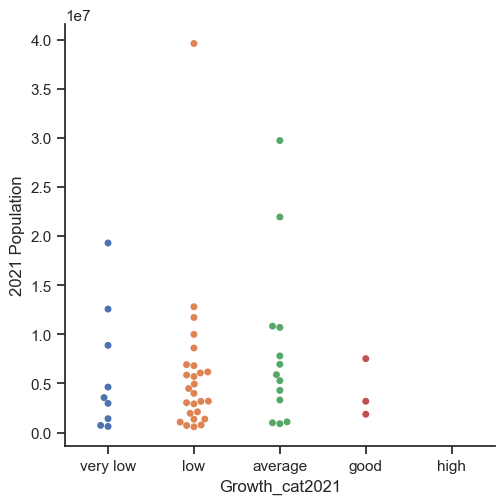

In [149]:
##plot to check how many states belong in each growth category
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Growth_cat2021", y='2021 Population',kind = "swarm", data=df)

**Summary- bins : -2 to 0 is very low, 1 to 2 is low, 3 to 5 is average, 6 to 10 is good, 11 to 15 is high(in percentage)
Summary: there is low growth in 2021 population in most of the states. There are 9 states that has very low population growth in 2021. 3 states has good growth in population. 13 states has average growth in population and remaining has low growth.

In [150]:
##Comparing growth of Growth since 2010 and Growth 2021 for each state
#define conditions
conditions = [df['Growth 2021'] > df['Growth Since 2010'], 
              df['Growth 2021'] < df['Growth Since 2010']]

#define choices
choices = ['2021', '2010']

#create new column in DataFrame that displays results of comparisons
df['Compare'] = np.select(conditions, choices, default='NA')

#view the DataFrame
df

,Rank,State,2021 Population,Growth 2021,2018 Population,2010 Census,Growth_cat2021,Growth Since 2010,% of US,Density (mi²),Code,White,Black,Indian,Asian,Hawaiian,Other,Growth_2018,Compare
0,1,California,39613493,0.38,39461588,37319502,low,6.15,11.84,254,CA,59.70,5.79,0.77,14.49,0.40,18.85,0.057399,2010
1,2,Texas,29730311,3.85,28628666,25241971,average,17.78,8.89,114,TX,73.97,12.13,0.50,4.80,0.09,8.51,0.134169,2010
2,3,Florida,21944577,3.30,21244317,18845537,average,16.44,6.56,409,FL,75.12,16.07,0.28,2.73,0.06,5.73,0.127286,2010
3,4,New York,19299981,-1.18,19530351,19399878,very low,-0.51,5.77,410,NY,63.66,15.66,0.41,8.42,0.05,11.81,0.006725,2010
4,5,Pennsylvania,12804123,0.03,12800922,12711160,low,0.73,3.83,286,PA,80.53,11.18,0.19,3.41,0.03,4.65,0.007062,2010
5,6,Illinois,12569321,-1.21,12723071,12840503,very low,-2.11,3.76,226,IL,71.53,14.20,0.26,5.47,0.04,8.50,-0.009145,2021
6,7,Ohio,11714618,0.33,11676341,11539336,low,1.52,3.50,287,OH,81.30,12.41,0.20,2.22,0.03,3.85,0.011873,2010
7,8,Georgia,10830007,3.03,10511131,9711881,average,11.51,3.24,188,GA,58.62,31.61,0.36,3.98,0.06,5.36,0.082296,2010
8,9,North Carolina,10701022,3.08,10381615,9574323,average,11.77,3.20,220,NC,68.68,21.44,1.21,2.85,0.07,5.75,0.084318,2010
9,10,Michigan,9992427,0.08,9984072,9877510,low,1.16,2.99,177,MI,78.41,13.79,0.54,3.13,0.03,4.10,0.010788,2010


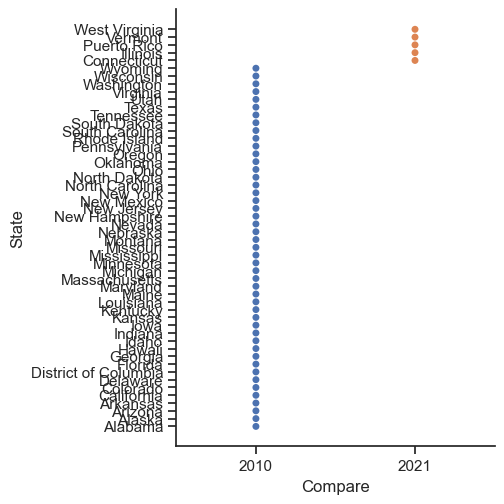

In [173]:
## Compare columns: shows the comparison in population growth in 2010 and 2021. 2010 value shows that growth was higher in 2010(Growth Since 2010) for that state 
# and 2021 shows that growth is higher in 2021.
##Creating plot to compare the polulation growth in 2021 and 2010
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="Compare", y='State', kind = "swarm", data=df)

**Summary: there are only 5 states that has more population growth in 2021 than 2010. 

In [152]:
##plotting % of  US population of each state.
fig = px.bar(df, x="State", y="% of US", color="Compare", barmode="group")
fig.show()

** Summary We can see the population contribution of each state and also red bar shows the states those had more population growth in 2021 than 2010.

In [112]:
## plotting race of each state
fig = px.bar(df, x = "State", y =["White", "Black", "Indian", "Asian", "Hawaiian","Other"])
fig.show()

**Summary : We can see the population by race for each state by hovering on the chart. Ex: Hawaii had 24.95% White population, 1.83% black population, 37.79 asian population, 10.06 Hawaiian, and 25.12 others.

In [153]:
##Ploting the race and population relationship
fig = px.scatter_matrix(df, dimensions=["White", "Black", "Indian", "Asian"], color="2021 Population")
fig.show()

**Summary: We can check  2021 population by race

In [172]:
##Write query ,Total Population of new york and population percentage of US and white population
fig = px.scatter(df.query("State=='New York'"), x="2021 Population", y="% of US", color = 'White')
fig.show()   


**Summary : New york total population is 19.299M that is 5.77 % of total US population and 63.66 white population in New york

# Comparing Plotly Vs Seaborn

Seaborn is good for static plotting whereas Plotly can be used for inetractive plotting.The stacked bar chart for race distribution in plotly looks much better and is easy to undertand.